In [25]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.metrics import f1_score,fbeta_score,matthews_corrcoef, log_loss, confusion_matrix,classification_report,make_scorer,balanced_accuracy_score
from sklearn.metrics import accuracy_score, roc_curve, auc,recall_score,roc_auc_score, average_precision_score, precision_score,precision_recall_curve,ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (OneHotEncoder, PowerTransformer, StandardScaler)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

In [26]:
pip install --upgrade numpy pandas matplotlib seaborn scikitplot scikit-learn catboost lime shap

  Using cached numpy-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


In [27]:
# Read the data set

df = pd.read_csv("predictive_maintenance.csv")

In [28]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [29]:
print("Air temperature [K]:", "Max:", max(df["Air temperature [K]"]), "Min:", min(df["Air temperature [K]"]))
print("Process temperature [K]:", "Max:", max(df["Process temperature [K]"]), "Min:", min(df["Process temperature [K]"]))
print("Rotational speed [rpm]:", "Max:", max(df["Rotational speed [rpm]"]), "Min:", min(df["Rotational speed [rpm]"]))
print("Torque [Nm]:", "Max:", max(df["Torque [Nm]"]), "Min:", min(df["Torque [Nm]"]))
print("Tool wear [min]:", "Max:", max(df["Tool wear [min]"]), "Min:", min(df["Tool wear [min]"]))


print("Type:", df["Type"].unique())
print("Failure Type:", df["Failure Type"].unique())

Air temperature [K]: Max: 304.5 Min: 295.3
Process temperature [K]: Max: 313.8 Min: 305.7
Rotational speed [rpm]: Max: 2886 Min: 1168
Torque [Nm]: Max: 76.6 Min: 3.8
Tool wear [min]: Max: 253 Min: 0
Type: ['M' 'L' 'H']
Failure Type: ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [30]:
df["Type"].value_counts()

,count
Type,
L,6000
M,2997
H,1003


In [31]:
# Product ID , UDI , Target are not needed
# So, drop them

df.drop(["Product ID", "UDI" , "Target"] , axis = 1 , inplace = True)

In [32]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,No Failure
9996,H,298.9,308.4,1632,31.8,17,No Failure
9997,M,299.0,308.6,1645,33.4,22,No Failure
9998,H,299.0,308.7,1408,48.5,25,No Failure


In [33]:
df.isnull().sum()

,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Failure Type,0


In [34]:
df["Failure Type"].value_counts()

,count
Failure Type,
No Failure,9652
Heat Dissipation Failure,112
Power Failure,95
Overstrain Failure,78
Tool Wear Failure,45
Random Failures,18


In [35]:
df["Failure Type"].replace({"No Failure" : 0 ,
                            "Heat Dissipation Failure" : 1 ,
                            "Power Failure" : 2 ,
                            "Overstrain Failure" : 3 ,
                            "Tool Wear Failure" : 4 ,
                            "Random Failures" : 5} ,
                            inplace = True)

In [36]:
df["Type"].replace({"H" : 0 ,"L" : 1 , "M" : 2} , inplace = True)

In [37]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0
9996,0,298.9,308.4,1632,31.8,17,0
9997,2,299.0,308.6,1645,33.4,22,0
9998,0,299.0,308.7,1408,48.5,25,0


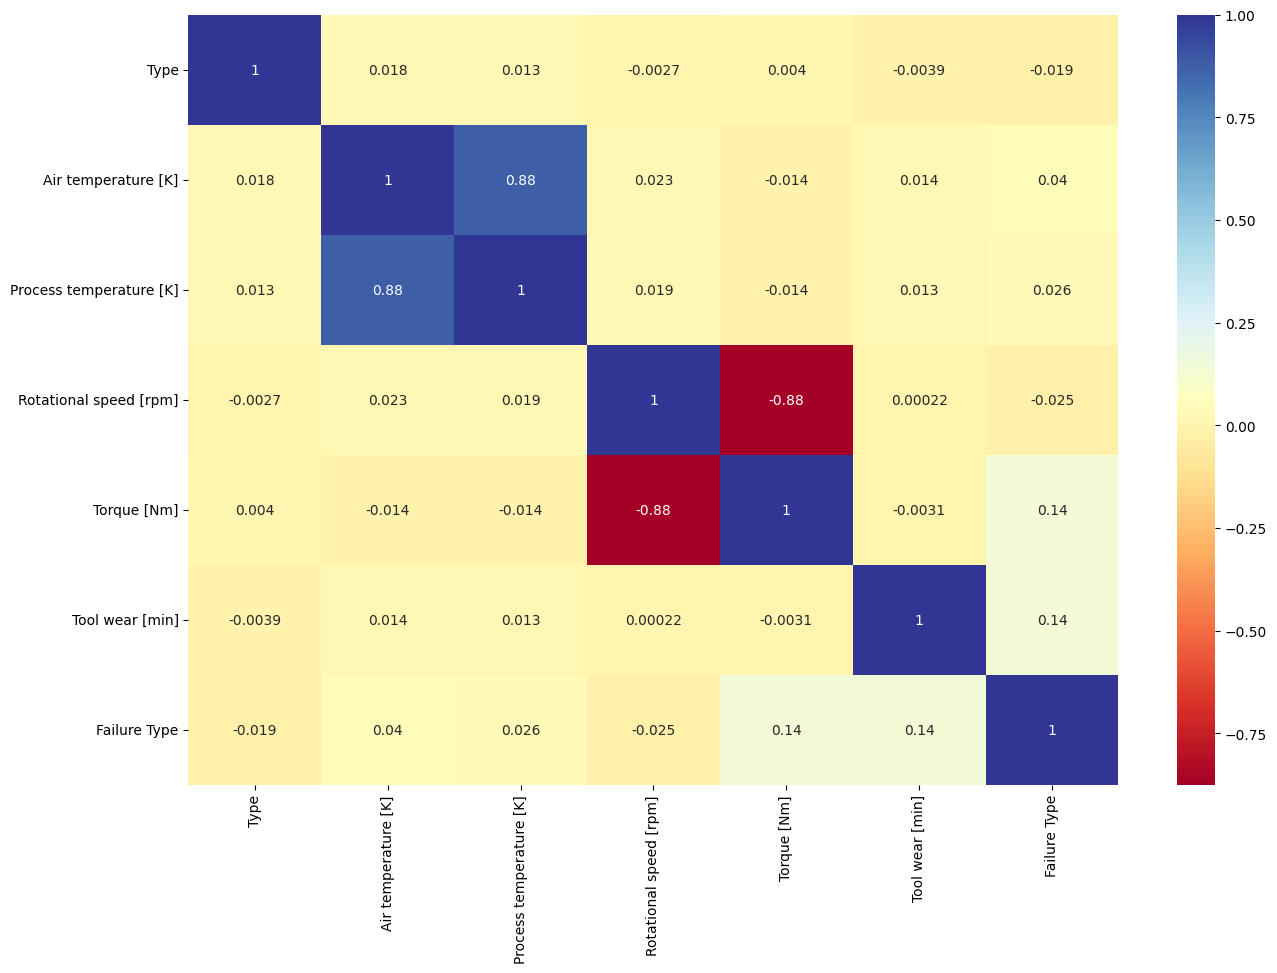

In [38]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")
plt.show()

In [39]:
df.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.19940,300.004930,310.005560,1538.776100,39.986910,107.951000,0.080600
std,0.60023,2.000259,1.483734,179.284096,9.968934,63.654147,0.479507
min,0.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,1.00000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,1.00000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,2.00000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,2.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,5.000000


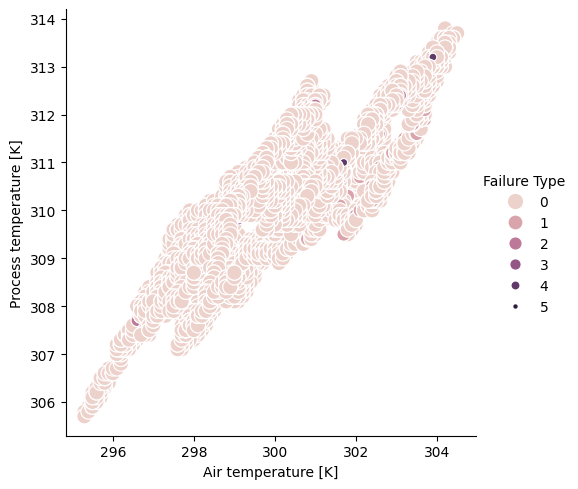

In [40]:
# Relational plot

sns.relplot(x = "Air temperature [K]" ,
            y = "Process temperature [K]" ,
            hue="Failure Type" ,
            size="Failure Type" ,
            sizes=(120 , 10) ,
            data = df)

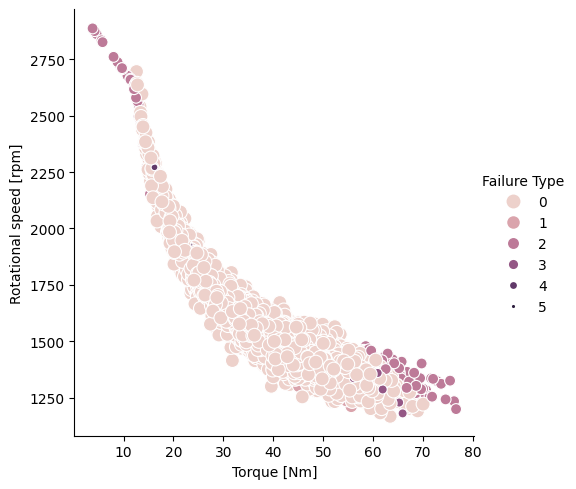

In [41]:
sns.relplot(x = "Torque [Nm]" ,
            y = "Rotational speed [rpm]" ,
            hue = "Failure Type" ,
            size = "Failure Type" ,
            sizes = (100 , 5) ,
            data = df)

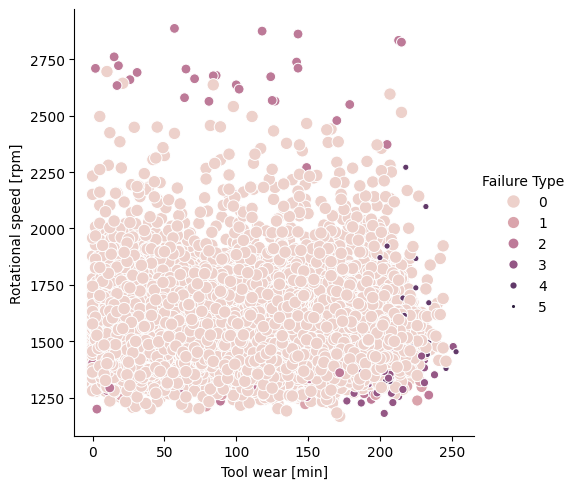

In [42]:
sns.relplot(x = "Tool wear [min]" ,
            y = "Rotational speed [rpm]" ,
            hue = "Failure Type" ,
            size = "Failure Type" ,
            sizes = (80, 5) ,
            data = df)

In [43]:
col_list = df.columns.to_list()

In [44]:
col_list

['Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Failure Type']

In [45]:
X = df[col_list[:-1]]
y = df["Failure Type"]

In [46]:
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,298.1,308.6,1551,42.8,0
1,1,298.2,308.7,1408,46.3,3
2,1,298.1,308.5,1498,49.4,5
3,1,298.2,308.6,1433,39.5,7
4,1,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14
9996,0,298.9,308.4,1632,31.8,17
9997,2,299.0,308.6,1645,33.4,22
9998,0,299.0,308.7,1408,48.5,25


In [47]:
y

,Failure Type
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [48]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5 , random_state = None)
for train_index , test_index in skf.split(X , y):
    x1_train , x1_test = X.iloc[train_index] , X.iloc[test_index]
    y1_train , y1_test = y.iloc[train_index] , y.iloc[test_index]
    train_0 , train_1 = len(y1_train[y1_train == 0]) , len(y1_train[y1_train == 1])
    test_0 , test_1 = len(y1_test[y1_test == 0]) , len(y1_test[y1_test == 1])
    print('train: 0=%d , 1=%d , Test: 0=%d , 1=%d' % (train_0 , train_1 , test_0 , test_1))

train: 0=7721 , 1=90 , Test: 0=1931 , 1=22
train: 0=7721 , 1=90 , Test: 0=1931 , 1=22
train: 0=7722 , 1=90 , Test: 0=1930 , 1=22
train: 0=7722 , 1=89 , Test: 0=1930 , 1=23
train: 0=7722 , 1=89 , Test: 0=1930 , 1=23


In [49]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 40 , test_size = 0.33 , stratify = y)

In [50]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state = 42)
X1_res , y1_res = smote.fit_resample(X_train , y_train)

In [51]:
X1_res

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,297.500000,308.700000,1371,46.500000,121
1,2,297.400000,308.600000,1452,41.200000,197
2,2,296.400000,307.300000,2077,19.100000,80
3,1,300.400000,309.300000,1413,50.300000,101
4,1,297.400000,308.100000,1348,57.400000,66
...,...,...,...,...,...,...
38743,1,302.567982,312.035964,1437,42.908492,201
38744,1,302.766184,312.183092,1507,36.246384,79
38745,1,299.733107,309.612309,1567,35.541596,183
38746,1,302.463023,311.872267,1308,59.649157,168


In [52]:
X1_res.shape

(38748, 6)

In [53]:
y1_res

,Failure Type
0,0
1,0
2,0
3,0
4,0
...,...
38743,5
38744,5
38745,5
38746,5


In [54]:
y1_res.shape

(38748,)

In [55]:
df_x = X1_res

In [56]:
df_x

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,297.500000,308.700000,1371,46.500000,121
1,2,297.400000,308.600000,1452,41.200000,197
2,2,296.400000,307.300000,2077,19.100000,80
3,1,300.400000,309.300000,1413,50.300000,101
4,1,297.400000,308.100000,1348,57.400000,66
...,...,...,...,...,...,...
38743,1,302.567982,312.035964,1437,42.908492,201
38744,1,302.766184,312.183092,1507,36.246384,79
38745,1,299.733107,309.612309,1567,35.541596,183
38746,1,302.463023,311.872267,1308,59.649157,168


In [57]:
df_x["Type"].replace({0:"H",1:"L",2:"M"}, inplace=True)

In [58]:
df_x

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,L,297.500000,308.700000,1371,46.500000,121
1,M,297.400000,308.600000,1452,41.200000,197
2,M,296.400000,307.300000,2077,19.100000,80
3,L,300.400000,309.300000,1413,50.300000,101
4,L,297.400000,308.100000,1348,57.400000,66
...,...,...,...,...,...,...
38743,L,302.567982,312.035964,1437,42.908492,201
38744,L,302.766184,312.183092,1507,36.246384,79
38745,L,299.733107,309.612309,1567,35.541596,183
38746,L,302.463023,311.872267,1308,59.649157,168


In [59]:
df_y = pd.DataFrame(y1_res)

In [60]:
df_y

,Failure Type
0,0
1,0
2,0
3,0
4,0
...,...
38743,5
38744,5
38745,5
38746,5


In [61]:
df_y["Failure Type"].replace({0:"No Failure",1:"Heat Dissipation Failure",2:"Power Failure",3:"Overstrain Failure",4:"Tool Wear Failure",5:"Random Failures"},inplace=True)

In [62]:
df_y

,Failure Type
0,No Failure
1,No Failure
2,No Failure
3,No Failure
4,No Failure
...,...
38743,Random Failures
38744,Random Failures
38745,Random Failures
38746,Random Failures


In [63]:
df1 = pd.concat([df_x , df_y] , axis = 1)

In [64]:
df1

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,L,297.500000,308.700000,1371,46.500000,121,No Failure
1,M,297.400000,308.600000,1452,41.200000,197,No Failure
2,M,296.400000,307.300000,2077,19.100000,80,No Failure
3,L,300.400000,309.300000,1413,50.300000,101,No Failure
4,L,297.400000,308.100000,1348,57.400000,66,No Failure
...,...,...,...,...,...,...,...
38743,L,302.567982,312.035964,1437,42.908492,201,Random Failures
38744,L,302.766184,312.183092,1507,36.246384,79,Random Failures
38745,L,299.733107,309.612309,1567,35.541596,183,Random Failures
38746,L,302.463023,311.872267,1308,59.649157,168,Random Failures


In [65]:
df1["Failure Type"].value_counts()

,count
Failure Type,
Overstrain Failure,6467
Heat Dissipation Failure,6464
Power Failure,6462
Tool Wear Failure,6461
Random Failures,6454
No Failure,6440


In [66]:
col_list = df.columns.to_list()

In [67]:
col_list

['Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Failure Type']

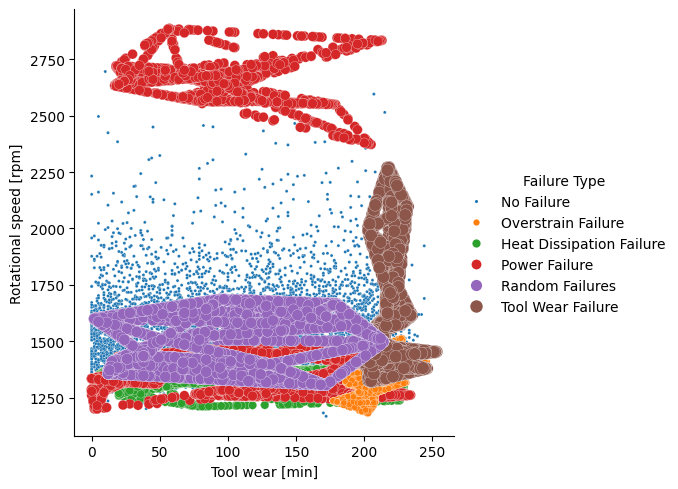

In [68]:
sns.relplot(x = "Tool wear [min]" ,
            y = "Rotational speed [rpm]" ,
            hue = "Failure Type" ,
            size = "Failure Type" ,
            sizes = (80 , 5) ,
            data = df1)

In [69]:
print(X_test.shape)
print(y_test.shape)

(3300, 6)
(3300,)


In [70]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


In [71]:
categorical_cols = X.select_dtypes(include="object").columns.to_list()
categorical_pipe = make_pipeline(OneHotEncoder(sparse=False, handle_unknown="ignore"))


to_log = ["Rotational speed [rpm]" , "Tool wear [min]"]
to_scale = ["Air temperature [K]" ,"Process temperature [K]" , "Torque [Nm]"]

numeric_pipe_1 = make_pipeline(PowerTransformer())
numeric_pipe_2 = make_pipeline(StandardScaler())

full = ColumnTransformer(transformers = [("categorical", categorical_pipe, categorical_cols),
                                         ("power_transform", numeric_pipe_1, to_log),
                                         ("standardization", numeric_pipe_2, to_scale)])

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3185
           1       0.82      0.97      0.89        37
           2       0.69      0.81      0.75        31
           3       0.68      0.81      0.74        26
           4       0.06      0.27      0.10        15
           5       0.01      0.17      0.03         6

    accuracy                           0.94      3300
   macro avg       0.54      0.66      0.58      3300
weighted avg       0.98      0.94      0.96      3300



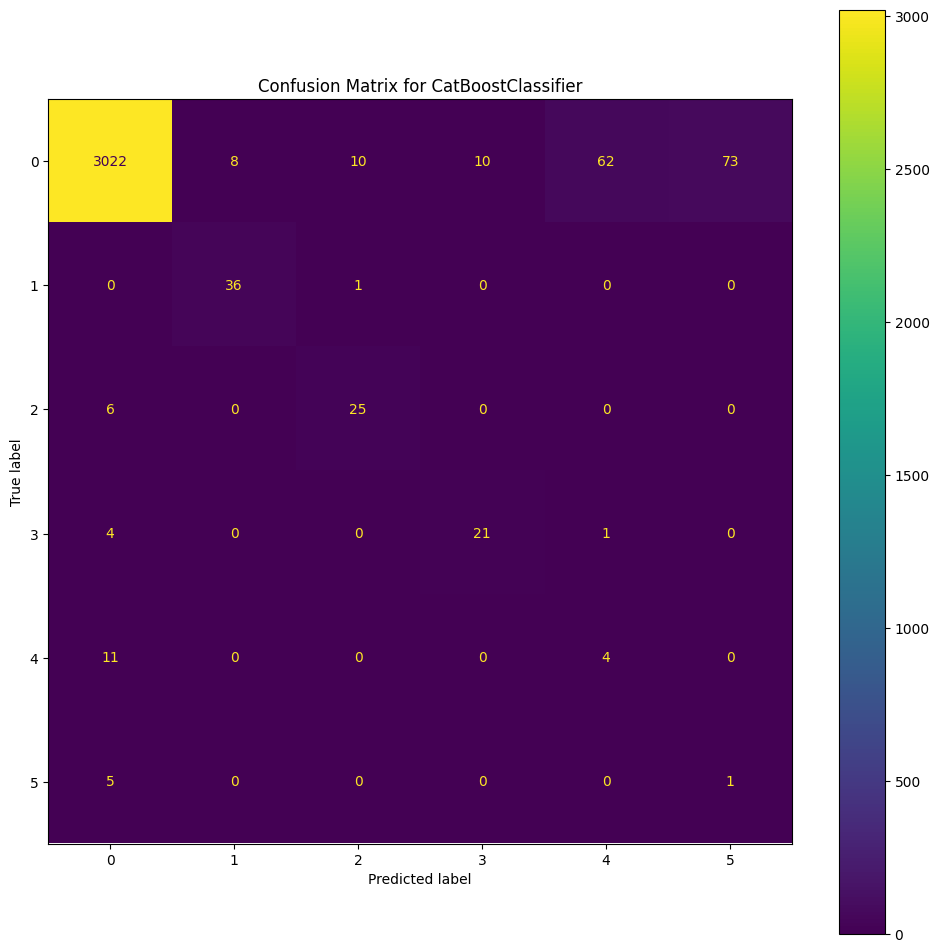

Accuracy for CatBoostClassifier: 94.21%


In [72]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

preprocessor = full.fit(X1_res, y1_res)
X1_res_processed = preprocessor.transform(X1_res)
X_test_processed = preprocessor.transform(X_test)


catboost_model = CatBoostClassifier(random_seed=42, logging_level='Silent')
catboost_model.fit(X1_res_processed, y1_res)


y_pred = catboost_model.predict(X_test_processed)


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12, 12))
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost_model.classes_)
cmp.plot(ax=ax)
plt.title(f"Confusion Matrix for CatBoostClassifier")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for CatBoostClassifier: {accuracy * 100:.2f}%")

In [73]:
import pickle

pickle.dump(catboost_model , open("Pred_Maintainance_final_.pkl","wb"))

In [74]:
input_data = pd.DataFrame({
    'Type' : [0.0],
    'Air temperature [K]' : [300.5],
    'Process temperature [K]' : [309.9],
    'Rotational speed [rpm]' : [1397.0],
    'Torque [Nm]' : [45.9],
    'Tool wear [min]' : [210.0]
})

model = pickle.load(open("Pred_Maintainance_final_.pkl","rb"))
prediction = model.predict(input_data)[0]
print(prediction)

[2]


In [75]:
model = pickle.load(open("Pred_Maintainance_final_.pkl","rb"))

for i in range(len(X_test)):
    actual = y_test.iloc[i]
    predicted = model.predict(X_test.iloc[[i]])[0]
    print(f"Actual: {actual}, Predicted: {predicted}, Features: {X_test.iloc[[i]].to_dict(orient='records')[0]}")

Actual: 0, Predicted: [0], Features: {'Type': 2, 'Air temperature [K]': 300.8, 'Process temperature [K]': 311.2, 'Rotational speed [rpm]': 1429, 'Torque [Nm]': 52.3, 'Tool wear [min]': 77}
Actual: 0, Predicted: [0], Features: {'Type': 2, 'Air temperature [K]': 300.8, 'Process temperature [K]': 311.9, 'Rotational speed [rpm]': 1356, 'Torque [Nm]': 44.3, 'Tool wear [min]': 214}
Actual: 0, Predicted: [0], Features: {'Type': 2, 'Air temperature [K]': 299.9, 'Process temperature [K]': 309.5, 'Rotational speed [rpm]': 2065, 'Torque [Nm]': 18.1, 'Tool wear [min]': 62}
Actual: 0, Predicted: [0], Features: {'Type': 1, 'Air temperature [K]': 298.8, 'Process temperature [K]': 309.9, 'Rotational speed [rpm]': 1482, 'Torque [Nm]': 39.1, 'Tool wear [min]': 45}
Actual: 0, Predicted: [0], Features: {'Type': 1, 'Air temperature [K]': 297.5, 'Process temperature [K]': 308.6, 'Rotational speed [rpm]': 1437, 'Torque [Nm]': 43.3, 'Tool wear [min]': 34}
Actual: 0, Predicted: [0], Features: {'Type': 1, 'Air 

In [76]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e5f8e8c4e8fbcb7c2fd0bbb7393b7970b5f2f999d2262532eddd800cbcfedd47
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [77]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import lime
import lime.lime_tabular

In [78]:
X1_res["Type"].replace({"H" : 0 ,"L" : 1 , "M" : 2} , inplace = True)

In [79]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X1_res.values,
    feature_names=X_train.columns,
    class_names=catboost_model.classes_,
    mode='classification'
)


instance_idx = 1

explanation = explainer.explain_instance(
    X_test.iloc[[instance_idx]].values[0],
    catboost_model.predict_proba,
    num_features=len(input_data.columns)
)


print("Local Explanation:")
explanation.show_in_notebook(show_table=True)


explanation_list = explanation.as_list()
print("Local Explanation List:")
print(explanation_list)

max_impact_feature = max(explanation_list, key=lambda x: abs(x[1]))

print("The feature that impacted the prediction the most is " + max_impact_feature[0] + " i.e, this above specified the feature within this specific range had the most significant impact on the model's prediction for the given instance. ")

Local Explanation:


Local Explanation List:
[('Type > 1.00', 0.0), ('300.70 < Air temperature [K] <= 302.16', 0.0), ('Process temperature [K] > 311.11', 0.0), ('1351.00 < Rotational speed [rpm] <= 1405.00', 0.0), ('35.47 < Torque [Nm] <= 47.87', 0.0), ('Tool wear [min] > 206.00', 0.0)]
The feature that impacted the prediction the most is Type > 1.00 i.e, this above specified the feature within this specific range had the most significant impact on the model's prediction for the given instance. 


In [80]:
X1_res

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,297.500000,308.700000,1371,46.500000,121
1,2,297.400000,308.600000,1452,41.200000,197
2,2,296.400000,307.300000,2077,19.100000,80
3,1,300.400000,309.300000,1413,50.300000,101
4,1,297.400000,308.100000,1348,57.400000,66
...,...,...,...,...,...,...
38743,1,302.567982,312.035964,1437,42.908492,201
38744,1,302.766184,312.183092,1507,36.246384,79
38745,1,299.733107,309.612309,1567,35.541596,183
38746,1,302.463023,311.872267,1308,59.649157,168


In [81]:
X1_res.to_csv("X1_res.csv")

In [82]:
X_test

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
6954,2,300.8,311.2,1429,52.3,77
7935,2,300.8,311.9,1356,44.3,214
6366,2,299.9,309.5,2065,18.1,62
1438,1,298.8,309.9,1482,39.1,45
8784,1,297.5,308.6,1437,43.3,34
...,...,...,...,...,...,...
7500,1,300.2,311.8,1410,51.4,189
4781,1,303.7,312.3,1384,45.9,121
2330,2,299.3,308.7,1390,49.3,215
6134,1,301.0,311.0,1581,37.0,127


In [83]:
pip install dice-ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 95.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
xarray 2024.9.0 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.


In [84]:
# data['Air temperature [K]'] = data['Air temperature [K]'].astype(float)

In [85]:
# data['Air temperature [K]'].dtype

In [86]:
import dice_ml
from dice_ml.utils import helpers


columns = ["Type", "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]" , "Failure Type"]
data = pd.DataFrame(columns=columns)

instance_idx = int(input())

# test_df = pd.DataFrame({
#         'Type' : [0.0],
#         'Air temperature [K]' : [300.5],
#         'Process temperature [K]' : [309.9],
#         'Rotational speed [rpm]' : [1397.0],
#         'Torque [Nm]' : [45.9],
#         'Tool wear [min]' : [210.0]
#         })

# Try this, because this outputs 2 ("Power Failure")

test_df = X_test.iloc[[instance_idx]]


d = dice_ml.Data(dataframe = df, continuous_features = ['Type' , 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], outcome_name='Failure Type')
m = dice_ml.Model(model = catboost_model, backend = "sklearn")

exp = dice_ml.Dice(d , m)

cf = exp.generate_counterfactuals(test_df, total_CFs = 2, desired_class = 0, features_to_vary=['Type' , 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])

cf.visualize_as_dataframe()

0


100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

Query instance (original outcome : 0)


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,2,300.799988,311.200012,1429,52.299999,77,0



Diverse Counterfactual set (new outcome: 0)


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,2,300.8,311.2,1429,40.3,77,0
1,2,300.8,311.2,1429,71.7,77,0


In [87]:
import dice_ml

# Assuming you have defined X_test and df appropriately

columns = ["Type", "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]", "Failure Type"]
data = pd.DataFrame(columns=columns)

instance_idx = int(input())

test_df = X_test.iloc[[instance_idx]]

d = dice_ml.Data(dataframe=df, continuous_features=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], outcome_name='Failure Type')
m = dice_ml.Model(model=catboost_model, backend="sklearn")

exp = dice_ml.Dice(d, m)

cf = exp.generate_counterfactuals(test_df, total_CFs=2, desired_class=0, features_to_vary=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])

counterfactual_df = cf.cf_examples_list[0].final_cfs_df

counterfactual_df = counterfactual_df.reset_index(drop=True)

print(counterfactual_df)

0


100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2                300.8                    311.2                    1429   
1     2                297.5                    311.2                    1429   

   Torque [Nm]  Tool wear [min]  Failure Type  
0         52.3              194             0  
1         52.3               77             0  


In [88]:
print(counterfactual_df)

   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2                300.8                    311.2                    1429   
1     2                297.5                    311.2                    1429   

   Torque [Nm]  Tool wear [min]  Failure Type  
0         52.3              194             0  
1         52.3               77             0  


In [89]:
df.to_csv("df.csv")